
# Lending Club Case Study


## Problem Statement

---

Use EDA to understand how consumer attributes and loan attributes influence the tendency of default on a loan.

- Use given dataset which has the information about past loan applicants and whether they 'defaulted' or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

- If one is able to identify risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

- In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

## Business Understanding

---

A consumer finance company specializes in lending various types of loans to urban customers. When the company receives a loan application, the company has to make critical decision for loan approval based on applicant's profile. Two types of risks are associated with the company's decision:
- If the applicant is likely to repay the loan, then not approving the loan results in **loss of business to the company**
- If the applicant is not likely to repay the loan, i.e. borrower is likely to default, then approving the loan **may lead to a financial loss for the company**

Lending loans to 'risky' applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

## Data Analysis Approach

---

#### As per exploratory data analysis learning, my intention is to follow these steps in given order to analyze the given dataset
1. Data sourcing
2. Data cleaning
3. Outliers detection
4. Univariate analysis
5. Bivariate analysis

### 1. Data Sourcing

---

Dataset `loan.csv` is already provided as part of the case study. This dataset contains the complete loan data for all the loans issued through the time period 2007 to 2011.

A data dictionary describing the meaning of column names \ variables is also provided `Data_Dictionary.xlsx` along with the dataset.

> 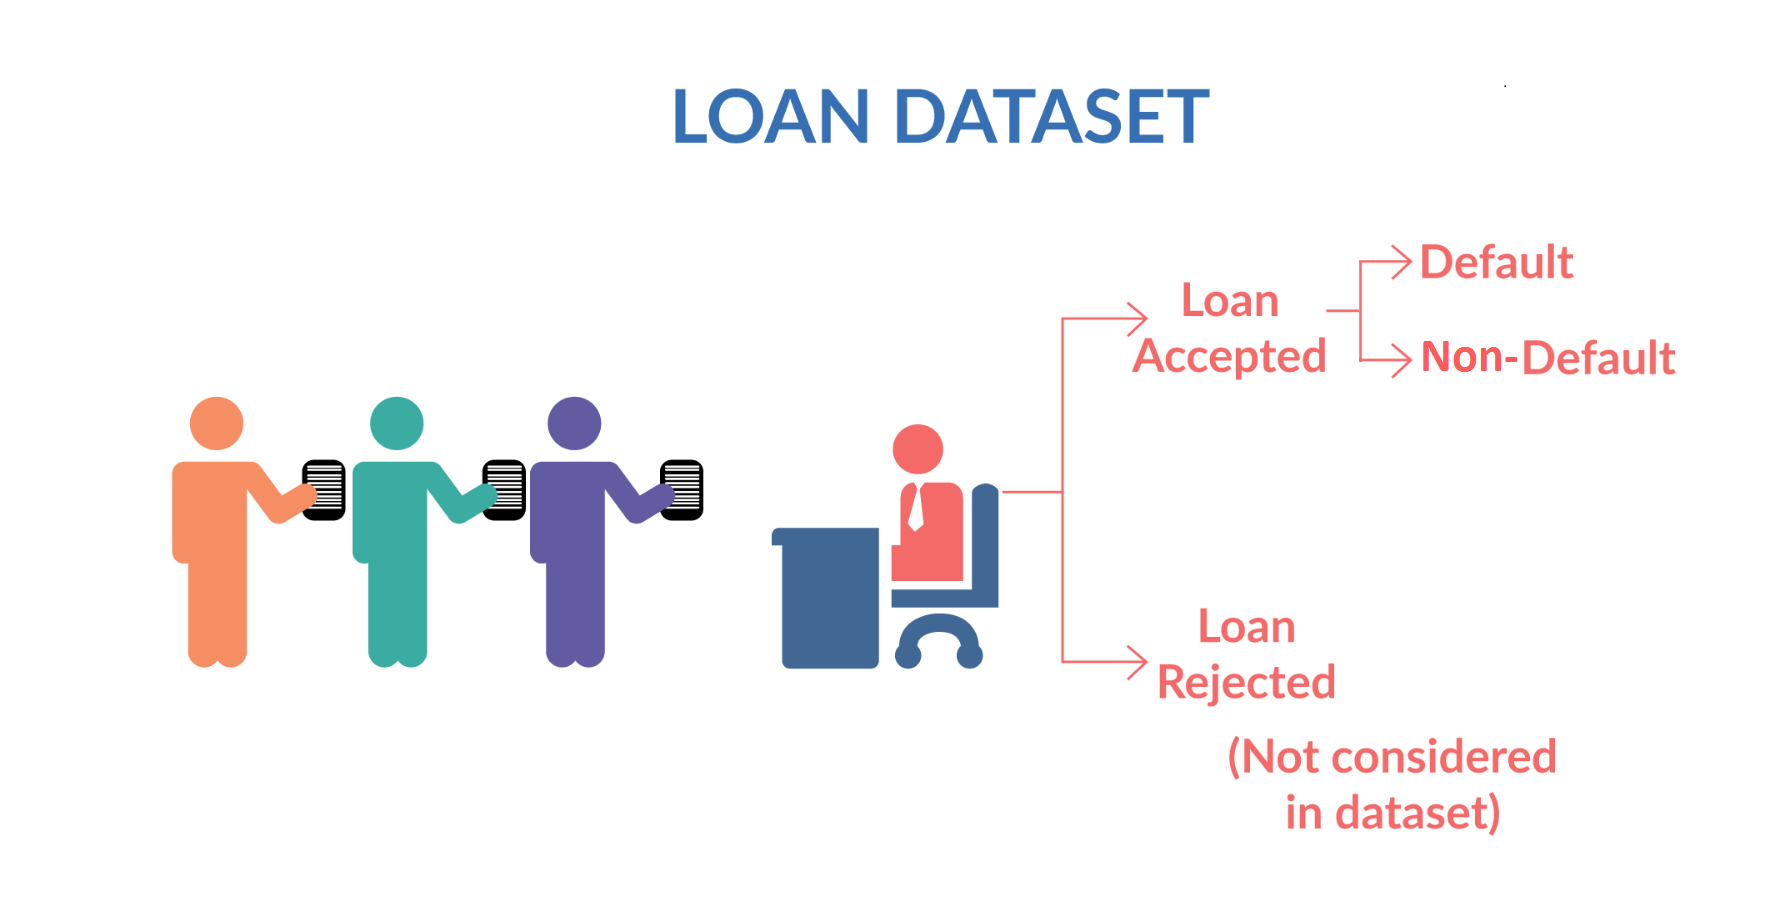

When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:

    1. **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)

    2. **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    3. **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

2. **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### 2. Data Cleaning

---

Data cleaning involves understanding and resolving quality issues with the data. This is the most time-consuming tasks of data analysis. I will be identifying formatting errors, missing values, repeated rows, spelling inconsistencies etc. With bad data it is very difficult to perform analysis. This could lead to errors and irrelevant results.

Overall steps to follow for data cleaning:
- Fix rows and columns
- Fix missing values
- Standardize values
- Fix invalid values
- Filter data

## `Lets begin with importing the dataset and cleaning it`

In [1]:
# Import required python libraries to work with CSV file
import pandas as pd

In [2]:
# Load loan.csv file in dataset variable
loan_Dataset = pd.read_csv('loan.csv')
loan_Dataset.head()

C:\Users\vaibhav.jain\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Load loan.csv file in dataset variable without the above type error
loan_Dataset = pd.read_csv('loan.csv', index_col=False, dtype='unicode')
loan_Dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [4]:
# Get basic information about dataset
print("Dataset Information = \n")
loan_Dataset.info()
print("\nDataset Shape =", loan_Dataset.shape)
print("\nDataset Description =")
loan_Dataset.describe()

Dataset Information = 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB

Dataset Shape = (39717, 111)

Dataset Description =


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,...,0,0,0,0,39020,39678,0,0,0,0
unique,39717,39717,885,1041,8205,2,371,15383,7,35,...,0,0,0,0,3,1,0,0,0,0
top,1077501,1296599,10000,10000,5000,36 months,10.99%,311.11,B,B3,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
freq,1,1,2833,2741,1309,29096,956,68,12020,2917,...,NaN,NaN,NaN,NaN,37339,39678,NaN,NaN,NaN,NaN


## `Handle Null Values, Missing Values, Cleanup Irrelevant Columns`

In [5]:
# Find columns which have no value\ null values
loan_Dataset.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
# Cleanup columns where all values are NA
dataset_updated = loan_Dataset.dropna(axis = 1, how = 'all', inplace = False)
dataset_updated.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [7]:
# Check dataset shape after dropping columns with all null values
dataset_updated.shape
# 57 columns left out of 111

(39717, 57)

In [8]:
# Find columns with a lot of unique values, these columns can't be used in data analysis
dataset_updated.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [9]:
# Based on above result drop columns with lot of unique values, 
    # columns with mostly unique values can not detect characteristics of a defaulter.

column_names_mostly_unique = ['id', 'member_id', 'url', 'desc', 'emp_title', 'title']

# Also drop the columns which looks irrelevant for our objective with analysis
    # features have information that are valid after loan is formed
    # these are behavioural features, which are mostly not available at the time of loan formation
    # all delinq_ features are when borrower stops paying installments - delinquency
    # credit lines related columns - these probably need better domain knowledge
    # out_ features - these are outstanding amounts - post loan formation feature
    # recovery features - post loan formation feature
    # months_since/ next_ / last_ columns - post loan formation features
column_names_irrelevant = ['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
                           'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                           'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                           'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
                           'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
                           'last_credit_pull_d', 'mths_since_last_delinq','mths_since_last_record',
                           'next_pymnt_d']

# Also drop the columns which have all values same (unique count = 1)
    # features where all values are same can not be used to define special characteristics of a defaulter
column_names_mostly_same_value = ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
                                 'policy_code', 'application_type', 'acc_now_delinq',
                                  'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']

dataset_updated = dataset_updated.drop(column_names_mostly_unique, axis = 1)
dataset_updated = dataset_updated.drop(column_names_irrelevant, axis = 1)
dataset_updated = dataset_updated.drop(column_names_mostly_same_value, axis = 1)
dataset_updated.shape
# Columns left = 19

(39717, 19)

In [10]:
# Keep only defaulted loans and fully paid loans from the dataset to analyse factors for loan defaulter
    # loan where status is Current, can't be used to detect if loan will be defaulted or not 
dataset_updated = dataset_updated[dataset_updated['loan_status'] != 'Current']
dataset_updated.shape

(38577, 19)

In [11]:
dataset_updated.nunique()

loan_amnt                 870
funded_amnt              1019
funded_amnt_inv          8050
term                        2
int_rate                  370
installment             15022
grade                       7
sub_grade                  35
emp_length                 11
home_ownership              5
annual_inc               5215
verification_status         3
issue_d                    55
loan_status                 2
purpose                    14
zip_code                  822
addr_state                 50
dti                      2853
pub_rec_bankruptcies        3
dtype: int64

In [12]:
# Find null values
dataset_updated.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

In [13]:
dataset_updated["emp_length"].mode()

0    10+ years
dtype: object

In [14]:
# Fill missing values in rows where emp_length is null
# use mode of employment length
dataset_updated["emp_length"].fillna(dataset_updated["emp_length"].mode()[0], inplace = True)

# Drop rows where pub_rec_bankruptcies is null
dataset_updated = dataset_updated[~dataset_updated['pub_rec_bankruptcies'].isnull()]

In [15]:
# Find null values
dataset_updated.isnull().sum()

# Now we don't have any null value in dataset

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

In [16]:
dataset_updated.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
count,37880,37880,37880,37880,37880,37880,37880,37880,37880,37880,37880,37880,37880,37880,37880,37880,37880,37880,37880
unique,860,1013,7714,2,336,14629,7,35,11,4,5152,3,52,2,14,809,49,2853,3
top,10000,10000,5000,36 months,10.99%,311.11,B,A4,10+ years,RENT,60000,Not Verified,Nov-11,Fully Paid,debt_consolidation,100xx,CA,0,0
freq,2738,2649,1294,28399,913,68,11466,2843,9402,18100,1441,15998,2062,32371,17764,557,6866,162,36238


## `Modify cell data, Update column data types`

In [17]:
# To group data together and perform calculations, we need to modify some data to represent it in numeric form
# so update feature values to trim/ replace extra string information

# drop "months" word from term column
dataset_updated['term'] = dataset_updated['term'].apply(lambda x: 
                                                                x.replace(' months', '')
                                                                .strip())
dataset_updated.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975,36,10.65%,162.87,B,B2,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0
1,2500,2500,2500,60,15.27%,59.83,C,C4,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,car,309xx,GA,1,0
2,2400,2400,2400,36,15.96%,84.33,C,C5,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0
3,10000,10000,10000,36,13.49%,339.31,C,C1,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20,0
5,5000,5000,5000,36,7.90%,156.46,A,A4,3 years,RENT,36000,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.2,0


In [18]:
# drop % symbol from int_rate column
dataset_updated['int_rate'] = dataset_updated['int_rate'].apply(lambda x: 
                                                                x.replace('%', '')
                                                                .strip())
dataset_updated.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975,36,10.65,162.87,B,B2,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0
1,2500,2500,2500,60,15.27,59.83,C,C4,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,car,309xx,GA,1,0
2,2400,2400,2400,36,15.96,84.33,C,C5,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0
3,10000,10000,10000,36,13.49,339.31,C,C1,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20,0
5,5000,5000,5000,36,7.90,156.46,A,A4,3 years,RENT,36000,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.2,0


In [19]:
# drop year, years, <, + from emp_length column
dataset_updated['emp_length'] = dataset_updated['emp_length'].apply(lambda x: 
                                                                    x.replace('years', '')
                                                                    .replace('year', '')
                                                                    .replace('<', '')
                                                                    .replace('+', '')
                                                                    .strip())
dataset_updated.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975,36,10.65,162.87,B,B2,10,RENT,24000,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0
1,2500,2500,2500,60,15.27,59.83,C,C4,1,RENT,30000,Source Verified,Dec-11,Charged Off,car,309xx,GA,1,0
2,2400,2400,2400,36,15.96,84.33,C,C5,10,RENT,12252,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0
3,10000,10000,10000,36,13.49,339.31,C,C1,10,RENT,49200,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20,0
5,5000,5000,5000,36,7.90,156.46,A,A4,3,RENT,36000,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.2,0


In [20]:
# drop xx from zip_code
dataset_updated['zip_code'] = dataset_updated['zip_code'].apply(lambda x: 
                                                                x.replace('xx', '')
                                                                .strip())
dataset_updated.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975,36,10.65,162.87,B,B2,10,RENT,24000,Verified,Dec-11,Fully Paid,credit_card,860,AZ,27.65,0
1,2500,2500,2500,60,15.27,59.83,C,C4,1,RENT,30000,Source Verified,Dec-11,Charged Off,car,309,GA,1,0
2,2400,2400,2400,36,15.96,84.33,C,C5,10,RENT,12252,Not Verified,Dec-11,Fully Paid,small_business,606,IL,8.72,0
3,10000,10000,10000,36,13.49,339.31,C,C1,10,RENT,49200,Source Verified,Dec-11,Fully Paid,other,917,CA,20,0
5,5000,5000,5000,36,7.90,156.46,A,A4,3,RENT,36000,Source Verified,Dec-11,Fully Paid,wedding,852,AZ,11.2,0


In [21]:
# Replace None with Other in Home_ownership column
dataset_updated['home_ownership'] = dataset_updated['home_ownership'].apply(lambda x: 
                                                                            x.replace('NONE', 'OTHER')
                                                                            .strip())
dataset_updated.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975,36,10.65,162.87,B,B2,10,RENT,24000,Verified,Dec-11,Fully Paid,credit_card,860,AZ,27.65,0
1,2500,2500,2500,60,15.27,59.83,C,C4,1,RENT,30000,Source Verified,Dec-11,Charged Off,car,309,GA,1,0
2,2400,2400,2400,36,15.96,84.33,C,C5,10,RENT,12252,Not Verified,Dec-11,Fully Paid,small_business,606,IL,8.72,0
3,10000,10000,10000,36,13.49,339.31,C,C1,10,RENT,49200,Source Verified,Dec-11,Fully Paid,other,917,CA,20,0
5,5000,5000,5000,36,7.90,156.46,A,A4,3,RENT,36000,Source Verified,Dec-11,Fully Paid,wedding,852,AZ,11.2,0


In [22]:
# Numeric column data type must be float, so that charts can be plotted
columns_to_convert_data_type = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
                                'installment', 'emp_length', 'annual_inc', 'dti',
                                'pub_rec_bankruptcies']

dataset_updated[columns_to_convert_data_type] = dataset_updated[columns_to_convert_data_type].astype(float)
dataset_updated.info()

dataset_updated.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37880 entries, 0 to 39680
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37880 non-null  float64
 1   funded_amnt           37880 non-null  float64
 2   funded_amnt_inv       37880 non-null  float64
 3   term                  37880 non-null  float64
 4   int_rate              37880 non-null  float64
 5   installment           37880 non-null  float64
 6   grade                 37880 non-null  object 
 7   sub_grade             37880 non-null  object 
 8   emp_length            37880 non-null  float64
 9   home_ownership        37880 non-null  object 
 10  annual_inc            37880 non-null  float64
 11  verification_status   37880 non-null  object 
 12  issue_d               37880 non-null  object 
 13  loan_status           37880 non-null  object 
 14  purpose               37880 non-null  object 
 15  zip_code           

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,5000.0,5000.0,4975.0,36.0,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860,AZ,27.65,0.0
1,2500.0,2500.0,2500.0,60.0,15.27,59.83,C,C4,1.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309,GA,1.00,0.0
2,2400.0,2400.0,2400.0,36.0,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606,IL,8.72,0.0
3,10000.0,10000.0,10000.0,36.0,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917,CA,20.00,0.0
5,5000.0,5000.0,5000.0,36.0,7.90,156.46,A,A4,3.0,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852,AZ,11.20,0.0


In [23]:
# Derived column
# Create new columns to split month and year from loan issue date

dataset_updated['issue_month'] = dataset_updated['issue_d'].apply(lambda x: 
                                                                  x.split('-')[0])

dataset_updated['issue_year'] = dataset_updated['issue_d'].apply(lambda x: 
                                                                '20' + x.split('-')[1]).astype(int)

dataset_updated.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_month,issue_year
0,5000.0,5000.0,4975.0,36.0,10.65,162.87,B,B2,10.0,RENT,...,Verified,Dec-11,Fully Paid,credit_card,860,AZ,27.65,0.0,Dec,2011
1,2500.0,2500.0,2500.0,60.0,15.27,59.83,C,C4,1.0,RENT,...,Source Verified,Dec-11,Charged Off,car,309,GA,1.00,0.0,Dec,2011
2,2400.0,2400.0,2400.0,36.0,15.96,84.33,C,C5,10.0,RENT,...,Not Verified,Dec-11,Fully Paid,small_business,606,IL,8.72,0.0,Dec,2011
3,10000.0,10000.0,10000.0,36.0,13.49,339.31,C,C1,10.0,RENT,...,Source Verified,Dec-11,Fully Paid,other,917,CA,20.00,0.0,Dec,2011
5,5000.0,5000.0,5000.0,36.0,7.90,156.46,A,A4,3.0,RENT,...,Source Verified,Dec-11,Fully Paid,wedding,852,AZ,11.20,0.0,Dec,2011


In [24]:
dataset_updated.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,pub_rec_bankruptcies,issue_year
count,37880.000000,37880.000000,37880.000000,37880.000000,37880.000000,37880.000000,37880.000000,3.788000e+04,37880.000000,37880.000000,37880.000000
mean,11067.092793,10801.615628,10367.230798,42.006969,11.955992,322.469358,5.213780,6.876387e+04,13.317518,0.043479,2010.357920
std,7364.014949,7103.047727,6999.222837,10.396463,3.710205,208.620127,3.446333,6.357379e+04,6.664633,0.204583,0.810569
min,500.000000,500.000000,0.000000,36.000000,5.420000,16.080000,1.000000,4.000000e+03,0.000000,0.000000,2007.000000
25%,5375.000000,5200.000000,5000.000000,36.000000,8.940000,165.820000,2.000000,4.000000e+04,8.190000,0.000000,2010.000000
50%,9637.500000,9600.000000,8974.845736,36.000000,11.830000,277.760000,5.000000,5.900000e+04,13.410000,0.000000,2011.000000
75%,15000.000000,15000.000000,14200.000000,60.000000,14.460000,425.550000,9.000000,8.200000e+04,18.590000,0.000000,2011.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,2.000000,2011.000000


### 3. Outliers

We will try to find outliers in numeric columns and cleanup those records

In [25]:
# Look at all the columns
dataset_updated.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'pub_rec_bankruptcies',
       'issue_month', 'issue_year'],
      dtype='object')

**Out of above columns, below are numeric and non-numeric columns**

- **Numeric columns** = 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'pub_rec_bankruptcies', 'issue_year'

- **Non Numeric columns** = 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'issue_month'

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


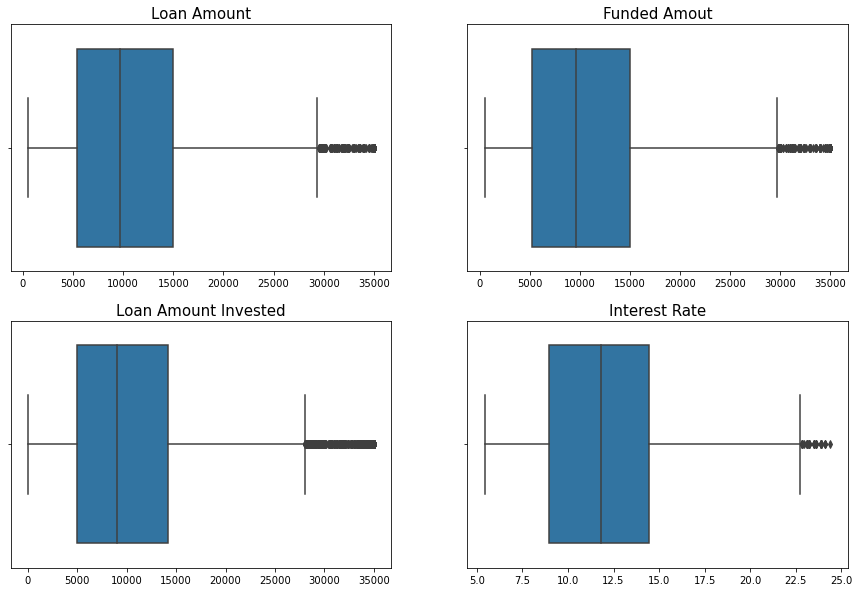

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].set_title("Loan Amount", fontsize=15)
sns.boxplot(data=dataset_updated, x ='loan_amnt', ax = ax[0, 0])
ax[0, 0].set(xlabel=None)

ax[0, 1].set_title("Funded Amout", fontsize=15)
sns.boxplot(data=dataset_updated, x ='funded_amnt', ax = ax[0, 1])
ax[0, 1].set(xlabel=None)

ax[1, 0].set_title("Loan Amount Invested", fontsize=15)
sns.boxplot(data=dataset_updated, x ='funded_amnt_inv', ax = ax[1, 0])
ax[1, 0].set(xlabel=None)

ax[1, 1].set_title("Interest Rate", fontsize=15)
sns.boxplot(data=dataset_updated, x ='int_rate', ax = ax[1, 1])
ax[1, 1].set(xlabel=None)

plt.show()

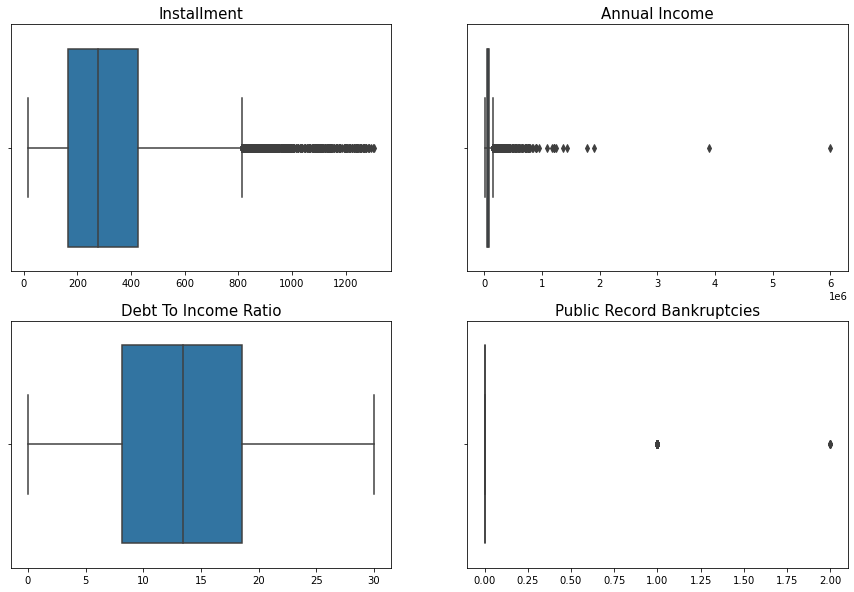

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].set_title("Installment", fontsize=15)
sns.boxplot(data=dataset_updated, x ='installment', ax = ax[0, 0])
ax[0, 0].set(xlabel=None)

ax[0, 1].set_title("Annual Income", fontsize=15)
sns.boxplot(data=dataset_updated, x ='annual_inc', ax = ax[0, 1])
ax[0, 1].set(xlabel=None)

ax[1, 0].set_title("Debt To Income Ratio", fontsize=15)
sns.boxplot(data=dataset_updated, x ='dti', ax = ax[1, 0])
ax[1, 0].set(xlabel=None)

ax[1, 1].set_title("Public Record Bankruptcies", fontsize=15)
sns.boxplot(data=dataset_updated, x ='pub_rec_bankruptcies', ax = ax[1, 1])
ax[1, 1].set(xlabel=None)

plt.show()

In [29]:
# Annual Income Box plot looks wierd so this column has lot of outliers,
# A cleanup is required to standardize the values and ignore outliers

dataset_updated['annual_inc'].describe()

count    3.788000e+04
mean     6.876387e+04
std      6.357379e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [30]:
dataset_updated['annual_inc'].quantile([0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99])

0.50     59000.0
0.60     65100.0
0.70     75000.0
0.80     90000.0
0.90    115000.0
0.95    140004.0
0.96    150000.0
0.97    165000.0
0.98    186000.0
0.99    234000.0
Name: annual_inc, dtype: float64

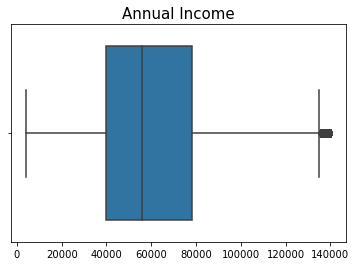

In [31]:
# clean up rows with more than 90 percentile
dataset_updated = dataset_updated[dataset_updated['annual_inc'] <= dataset_updated['annual_inc'].quantile(0.95)]

plt.title("Annual Income", fontsize = 15)
ax = sns.boxplot(data=dataset_updated, x='annual_inc')
ax.set(xlabel=None)

plt.show()

### 4. Univariate analysis

---

Here we study one variable at a time and separately understand each variable and its impact on the data distribution\ summary metrics.

Variables can be a categorical or quantitative in nature, and both can represent summarised view of the dataset.

- **Numeric columns** = 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'pub_rec_bankruptcies', 'issue_year'

- **Non Numeric columns** = 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'issue_month'

In [32]:
# Filter Defaulted and paid loans
dataset_Paid_Loans = dataset_updated[dataset_updated['loan_status'] == 'Fully Paid']
dataset_Defaulted_Loans = dataset_updated[dataset_updated['loan_status'] == 'Charged Off']


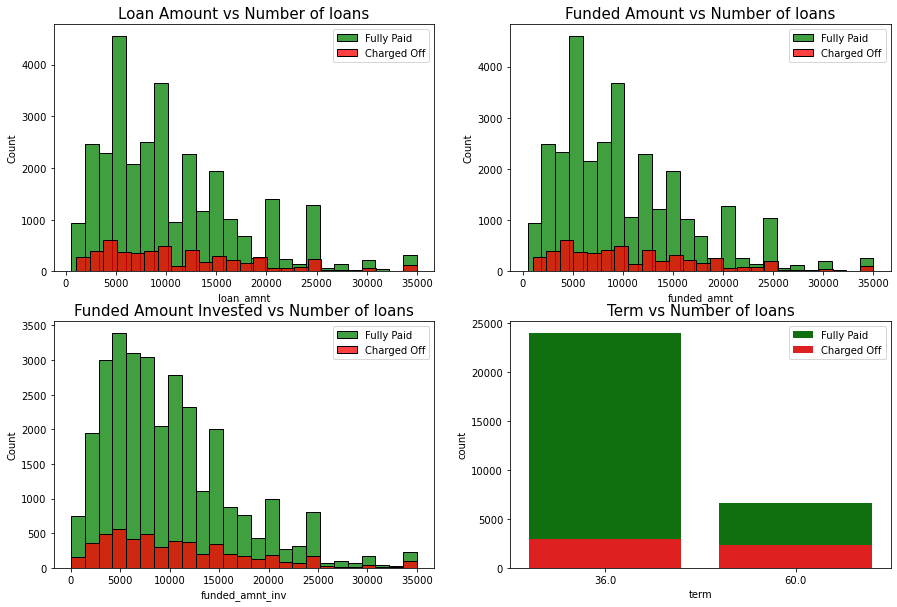

In [33]:
# Create histogram plots for various features

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].set_title("Loan Amount vs Number of loans", fontsize=15)
sns.histplot(data=dataset_Paid_Loans, x='loan_amnt', bins = 25, ax = ax[0, 0], color = 'g')
sns.histplot(data=dataset_Defaulted_Loans, x='loan_amnt', bins = 25, ax = ax[0, 0], color = 'r')
ax[0, 0].legend(labels=["Fully Paid", "Charged Off"])

ax[0, 1].set_title("Funded Amount vs Number of loans", fontsize=15)
sns.histplot(data=dataset_Paid_Loans, x='funded_amnt', bins = 25, ax = ax[0, 1], color = 'g')
sns.histplot(data=dataset_Defaulted_Loans, x='funded_amnt', bins = 25, ax = ax[0, 1], color = 'r')
ax[0, 1].legend(labels=["Fully Paid", "Charged Off"])

ax[1, 0].set_title("Funded Amount Invested vs Number of loans", fontsize=15)
sns.histplot(data=dataset_Paid_Loans, x='funded_amnt_inv', bins = 25, ax = ax[1, 0], color = 'g')
sns.histplot(data=dataset_Defaulted_Loans, x='funded_amnt_inv', bins = 25, ax = ax[1, 0], color = 'r')
ax[1, 0].legend(labels=["Fully Paid", "Charged Off"])

ax[1, 1].set_title("Term vs Number of loans", fontsize=15)
sns.countplot(data=dataset_Paid_Loans, x='term', ax = ax[1, 1], color = 'g')
sns.countplot(data=dataset_Defaulted_Loans, x='term', ax = ax[1, 1], color = 'r')
ax[1, 1].legend(labels=["Fully Paid", "Charged Off"])

plt.show()

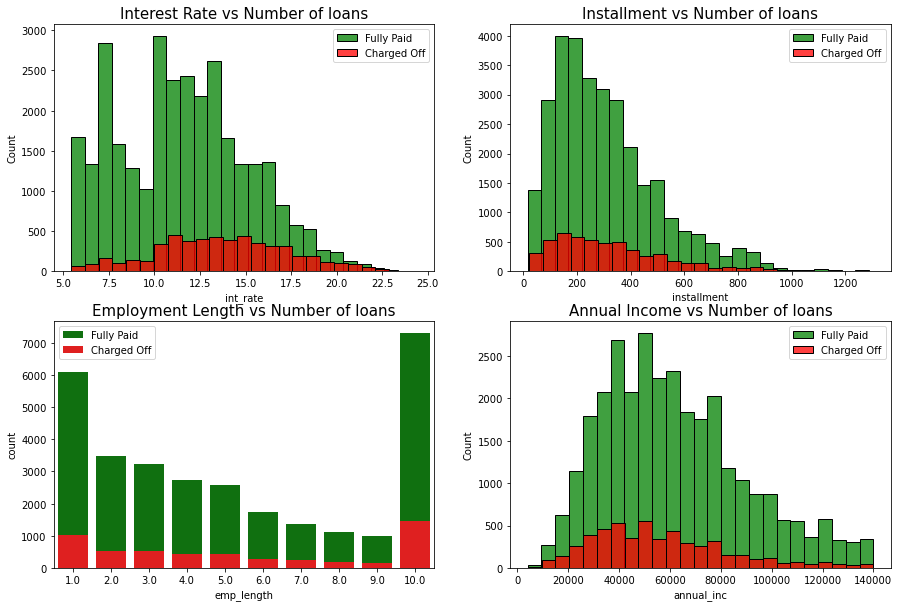

In [34]:
# Create histogram plots for various features

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].set_title("Interest Rate vs Number of loans", fontsize=15)
sns.histplot(data=dataset_Paid_Loans, x='int_rate', bins = 25, ax = ax[0, 0], color = 'g')
sns.histplot(data=dataset_Defaulted_Loans, x='int_rate', bins = 25, ax = ax[0, 0], color = 'r')
ax[0, 0].legend(labels=["Fully Paid", "Charged Off"])

ax[0, 1].set_title("Installment vs Number of loans", fontsize=15)
sns.histplot(data=dataset_Paid_Loans, x='installment', bins = 25, ax = ax[0, 1], color = 'g')
sns.histplot(data=dataset_Defaulted_Loans, x='installment', bins = 25, ax = ax[0, 1], color = 'r')
ax[0, 1].legend(labels=["Fully Paid", "Charged Off"])

ax[1, 0].set_title("Employment Length vs Number of loans", fontsize=15)
sns.countplot(data=dataset_Paid_Loans, x='emp_length', ax = ax[1, 0], color = 'g')
sns.countplot(data=dataset_Defaulted_Loans, x='emp_length', ax = ax[1, 0], color = 'r')
ax[1, 0].legend(labels=["Fully Paid", "Charged Off"])

ax[1, 1].set_title("Annual Income vs Number of loans", fontsize=15)
sns.histplot(data=dataset_Paid_Loans, x='annual_inc', bins = 25, ax = ax[1, 1], color = 'g')
sns.histplot(data=dataset_Defaulted_Loans, x='annual_inc', bins = 25, ax = ax[1, 1], color = 'r')
ax[1, 1].legend(labels=["Fully Paid", "Charged Off"])

plt.show()

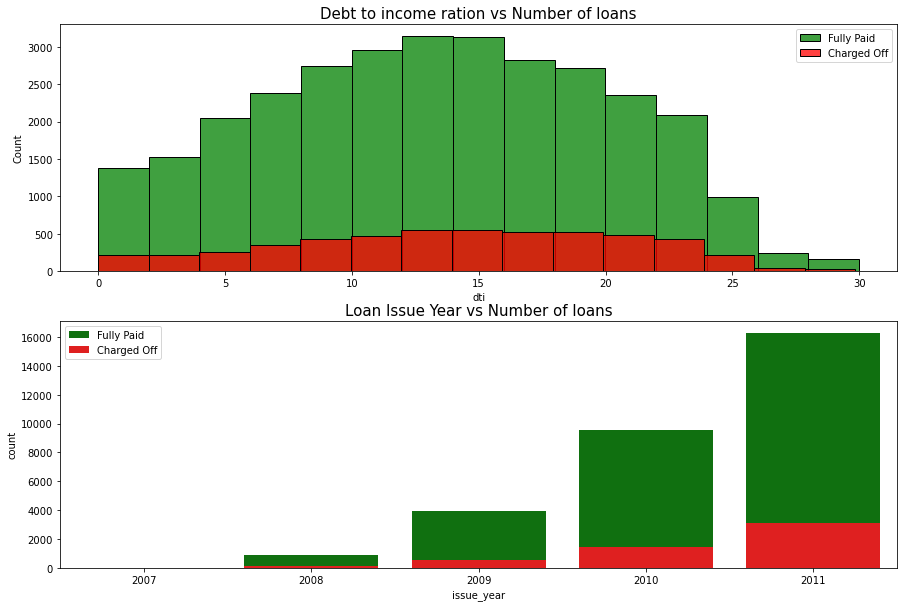

In [35]:
# Create histogram plots for various features

fig, ax = plt.subplots(2, 1, figsize=(15, 10))

ax[0].set_title("Debt to income ration vs Number of loans", fontsize=15)
sns.histplot(data=dataset_Paid_Loans, x='dti', bins = 15, ax = ax[0], color = 'g')
sns.histplot(data=dataset_Defaulted_Loans, x='dti', bins = 15, ax = ax[0], color = 'r')
ax[0].legend(labels=["Fully Paid", "Charged Off"])

ax[1].set_title("Loan Issue Year vs Number of loans", fontsize=15)
sns.countplot(data=dataset_Paid_Loans, x='issue_year', ax = ax[1], color = 'g')
sns.countplot(data=dataset_Defaulted_Loans, x='issue_year', ax = ax[1], color = 'r')
ax[1].legend(labels=["Fully Paid", "Charged Off"])

plt.show()

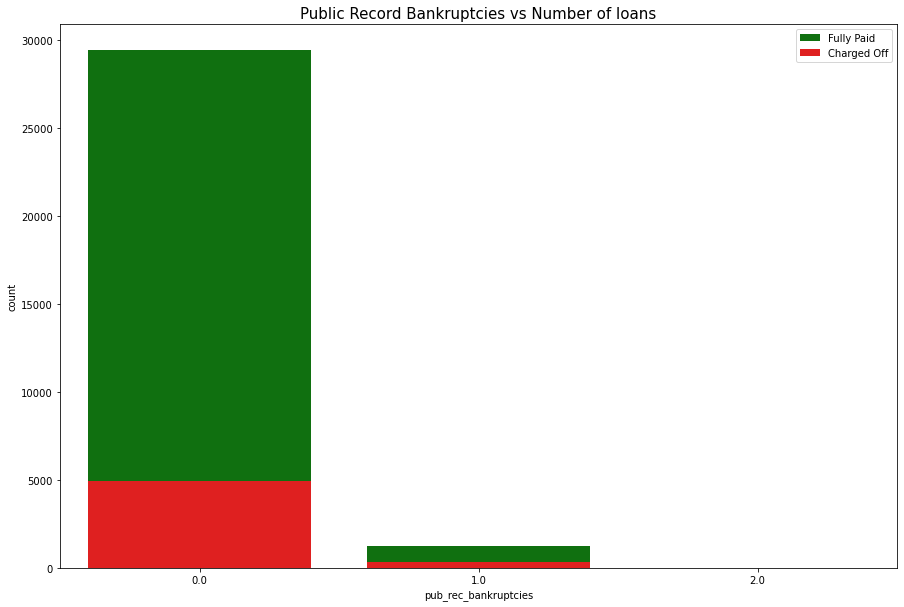

In [36]:
# Create histogram plots for various features

plt.figure(figsize=(15,10))
plt.title("Public Record Bankruptcies vs Number of loans", fontsize=15)
sns.countplot(data=dataset_Paid_Loans, x='pub_rec_bankruptcies', color = 'g')
ax = sns.countplot(data=dataset_Defaulted_Loans, x='pub_rec_bankruptcies', color = 'r')
plt.legend(labels=["Fully Paid", "Charged Off"])

plt.show()

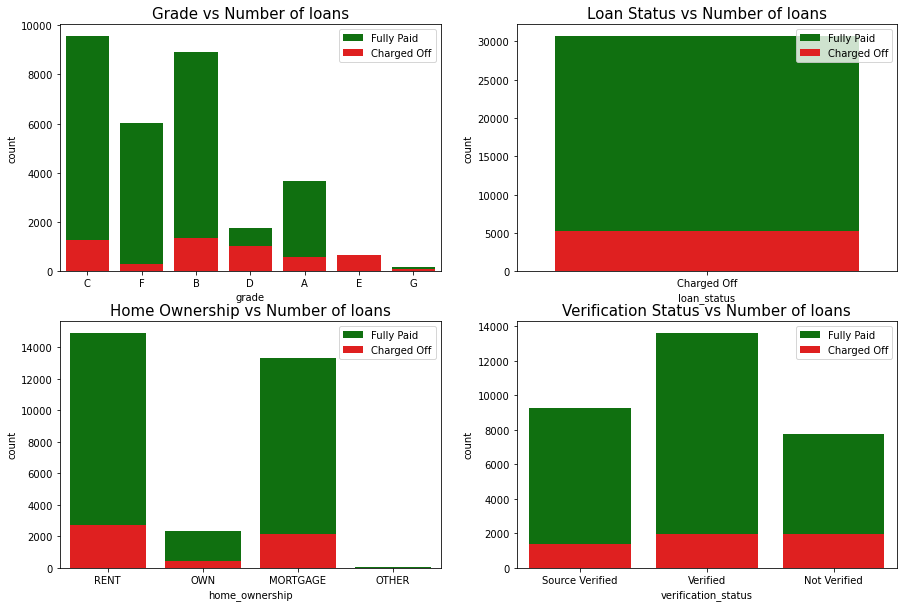

In [37]:
# Create histogram plots for various features

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].set_title("Grade vs Number of loans", fontsize=15)
sns.countplot(data=dataset_Paid_Loans, x='grade', ax = ax[0, 0], color = 'g')
sns.countplot(data=dataset_Defaulted_Loans, x='grade', ax = ax[0, 0], color = 'r')
ax[0, 0].legend(labels=["Fully Paid", "Charged Off"])

ax[0, 1].set_title("Loan Status vs Number of loans", fontsize=15)
sns.countplot(data=dataset_Paid_Loans, x='loan_status', ax = ax[0, 1], color = 'g')
sns.countplot(data=dataset_Defaulted_Loans, x='loan_status', ax = ax[0, 1], color = 'r')
ax[0, 1].legend(labels=["Fully Paid", "Charged Off"])

ax[1, 0].set_title("Home Ownership vs Number of loans", fontsize=15)
sns.countplot(data=dataset_Paid_Loans, x='home_ownership', ax = ax[1, 0], color = 'g')
sns.countplot(data=dataset_Defaulted_Loans, x='home_ownership', ax = ax[1, 0], color = 'r')
ax[1, 0].legend(labels=["Fully Paid", "Charged Off"])

ax[1, 1].set_title("Verification Status vs Number of loans", fontsize=15)
sns.countplot(data=dataset_Paid_Loans, x='verification_status', ax = ax[1, 1], color = 'g')
sns.countplot(data=dataset_Defaulted_Loans, x='verification_status', ax = ax[1, 1], color = 'r')
ax[1, 1].legend(labels=["Fully Paid", "Charged Off"])

plt.show()

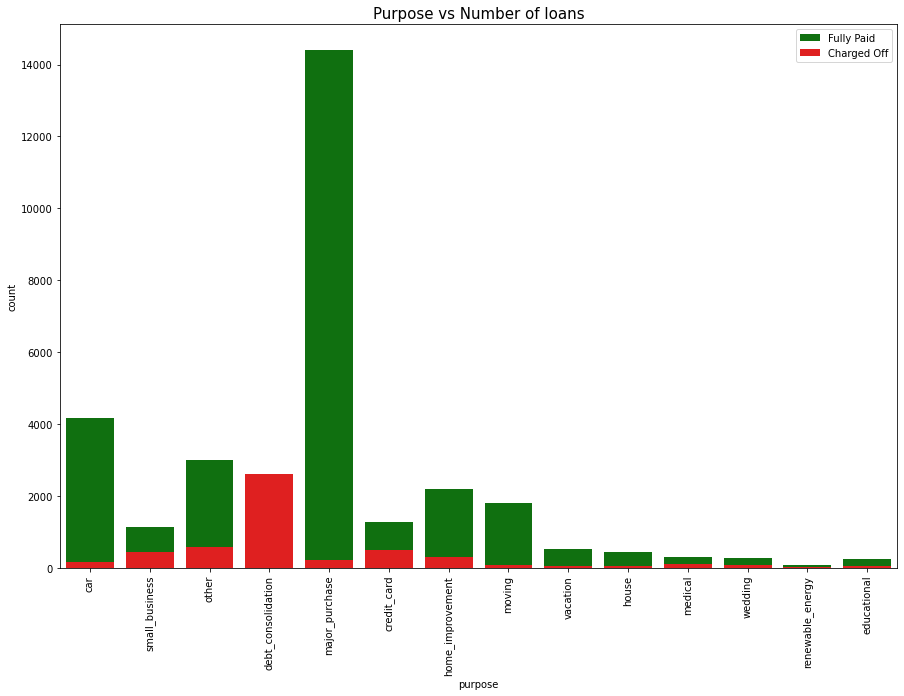

In [38]:
# Create histogram plots for various features

plt.figure(figsize=(15,10))
plt.title("Purpose vs Number of loans", fontsize=15)
plt.xticks(rotation=90)
sns.countplot(data=dataset_Paid_Loans, x='purpose', color = 'g')
sns.countplot(data=dataset_Defaulted_Loans, x='purpose', color = 'r')
plt.legend(labels=["Fully Paid", "Charged Off"])

plt.show()

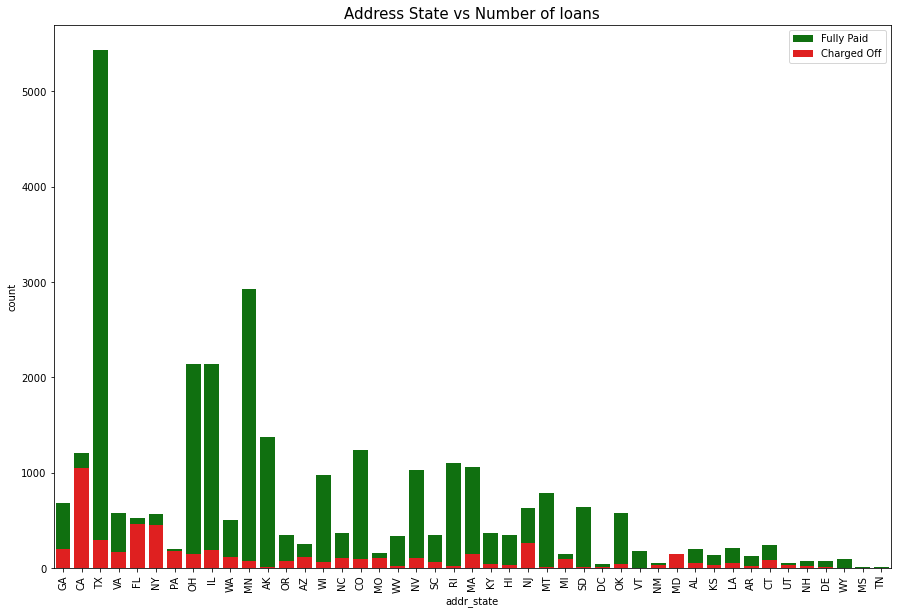

In [39]:
# Create histogram plots for various features

plt.figure(figsize=(15,10))
plt.title("Address State vs Number of loans", fontsize=15)
plt.xticks(rotation=90)
sns.countplot(data=dataset_Paid_Loans, x='addr_state', color = 'g')
sns.countplot(data=dataset_Defaulted_Loans, x='addr_state', color = 'r')
plt.legend(labels=["Fully Paid", "Charged Off"])

plt.show()

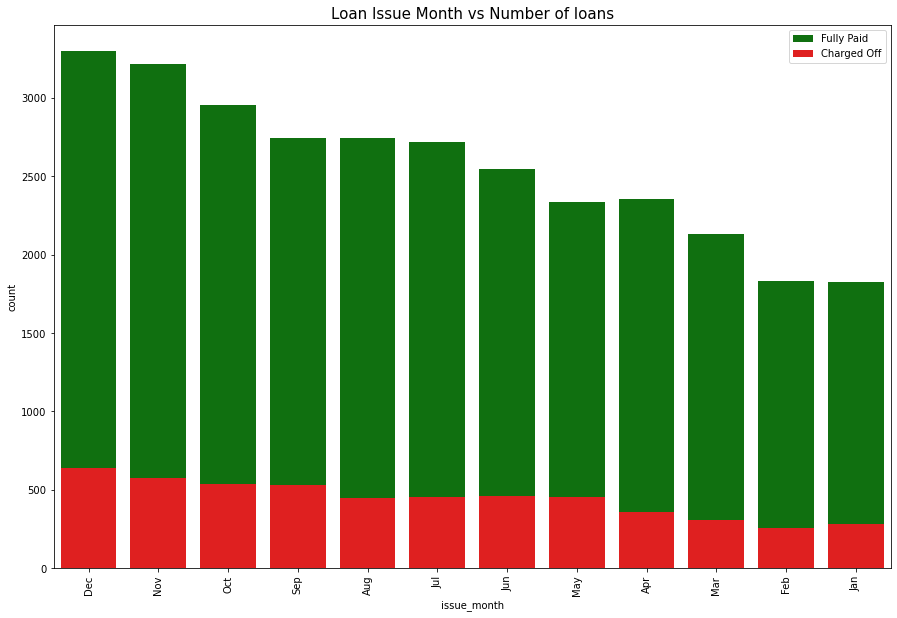

In [40]:
# Create histogram plots for various features

plt.figure(figsize=(15,10))
plt.title("Loan Issue Month vs Number of loans", fontsize=15)
plt.xticks(rotation=90)
sns.countplot(data=dataset_Paid_Loans, x='issue_month', color = 'g')
sns.countplot(data=dataset_Defaulted_Loans, x='issue_month', color = 'r')
plt.legend(labels=["Fully Paid", "Charged Off"])

plt.show()

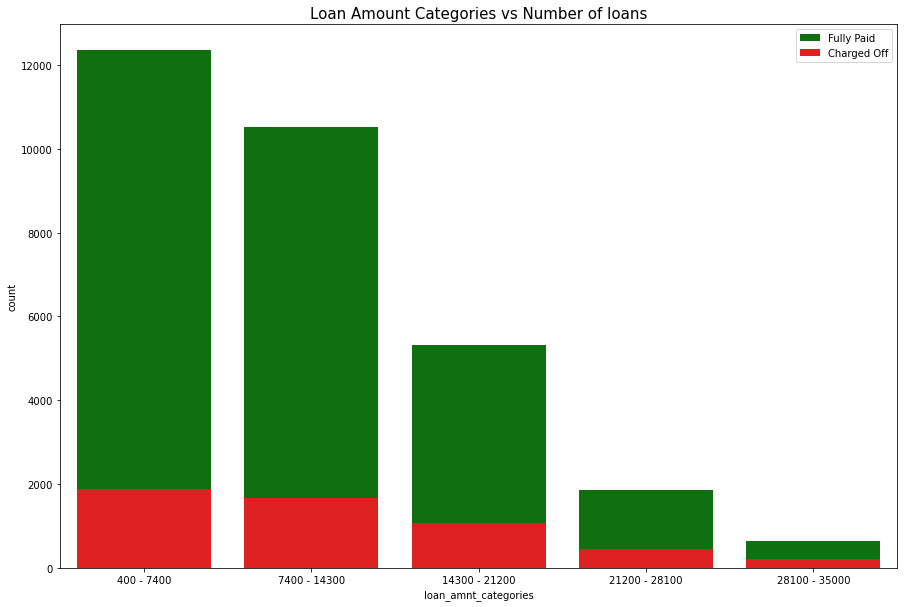

In [41]:
# Create Categorical variables from continues numeric variables
# Lets analyse loan_amnt, annual_inc, int_rate by creating categories out of these continuous features

## Loan Amount Categories
dataset_updated['loan_amnt_categories']= pd.cut(
    dataset_updated['loan_amnt'], 
    bins=5,
    labels = ['400 - 7400','7400 - 14300','14300 - 21200','21200 - 28100','28100 - 35000'])

plt.figure(figsize=(15,10))
plt.title("Loan Amount Categories vs Number of loans", fontsize=15)
sns.countplot(data=dataset_updated[dataset_updated['loan_status'] == 'Fully Paid'], x='loan_amnt_categories', color = 'g')
sns.countplot(data=dataset_updated[dataset_updated['loan_status'] == 'Charged Off'], x='loan_amnt_categories', color = 'r')
plt.legend(labels=["Fully Paid", "Charged Off"])

plt.show()

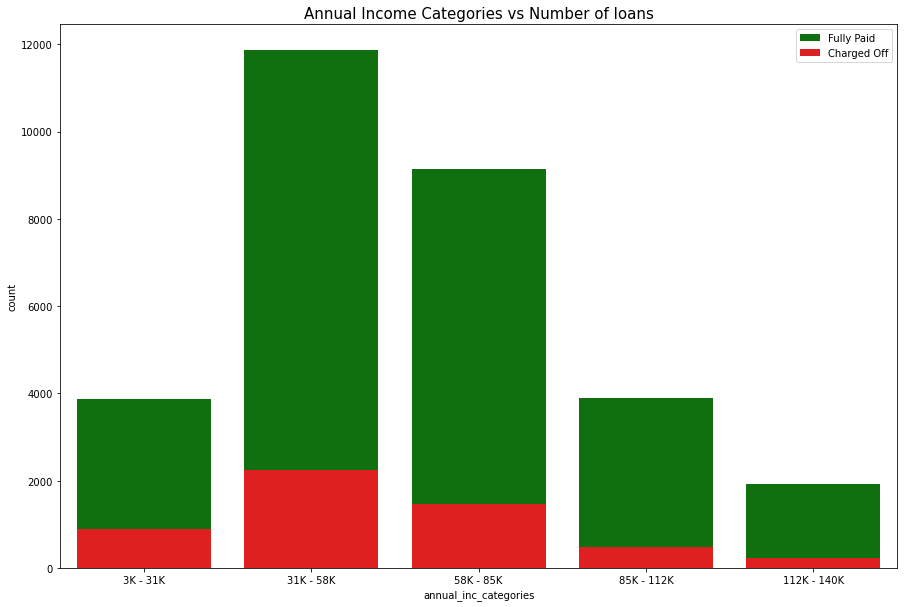

In [42]:
## Annual Income Categories

dataset_updated['annual_inc_categories']= pd.cut(
    dataset_updated['annual_inc'], 
    bins=5,
    labels = ['3K - 31K','31K - 58K','58K - 85K','85K - 112K','112K - 140K'])

plt.figure(figsize=(15,10))
plt.title("Annual Income Categories vs Number of loans", fontsize=15)
sns.countplot(data=dataset_updated[dataset_updated['loan_status'] == 'Fully Paid'], x='annual_inc_categories', color = 'g')
sns.countplot(data=dataset_updated[dataset_updated['loan_status'] == 'Charged Off'], x='annual_inc_categories', color = 'r')
plt.legend(labels=["Fully Paid", "Charged Off"])

plt.show()

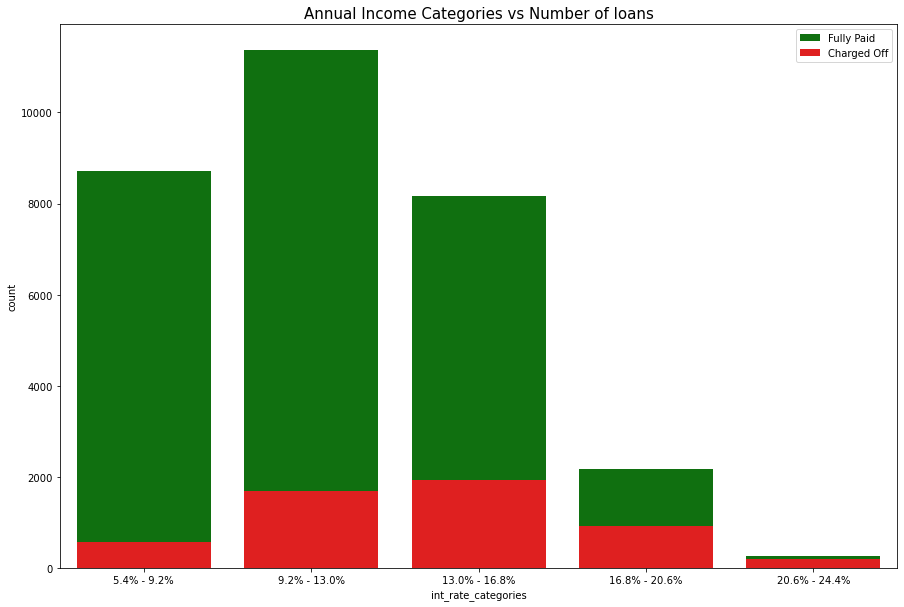

In [43]:
## Interest Rate Categories

dataset_updated['int_rate_categories']= pd.cut(
    dataset_updated['int_rate'], 
    bins=5,
    labels = ['5.4% - 9.2%','9.2% - 13.0%','13.0% - 16.8%','16.8% - 20.6%','20.6% - 24.4%'])

plt.figure(figsize=(15,10))
plt.title("Annual Income Categories vs Number of loans", fontsize=15)
sns.countplot(data=dataset_updated[dataset_updated['loan_status'] == 'Fully Paid'], x='int_rate_categories', color = 'g')
sns.countplot(data=dataset_updated[dataset_updated['loan_status'] == 'Charged Off'], x='int_rate_categories', color = 'r')
plt.legend(labels=["Fully Paid", "Charged Off"])

plt.show()

## `Univariate Observations`

### Based on number of loans in each of the visualizations, we can infer that loan applications with below features have more chances to be defaulters

- ### Loan amount up to 15000
- ### Having interest rate in range of 9% - 13%, 
- ### Having interest rate > 20.6% there is very high probability that loan will be defaulted
- ### Having experience less than 1 year or more than 10 years
- ### Is 36 month loan
- ### Annual Income within range of 31K - 58K
- ### DTI range between 10 to 25
- ### loan applied in 2011
- ### Grade B, C, or D
- ### Home ownership of Rent or Mortgage
- ### Verification status of 'Not Verified' or 'verified'
- ### Loan purpose of 'debt_condolidation'
- ### Are from CA, TX, FL, NY, NJ states
- ### Loan applied in the month of December, November

### 5. Bivariate analysis

---
This analysis is used to find co-relation between different variables, Lets analyse if one column affects other columns


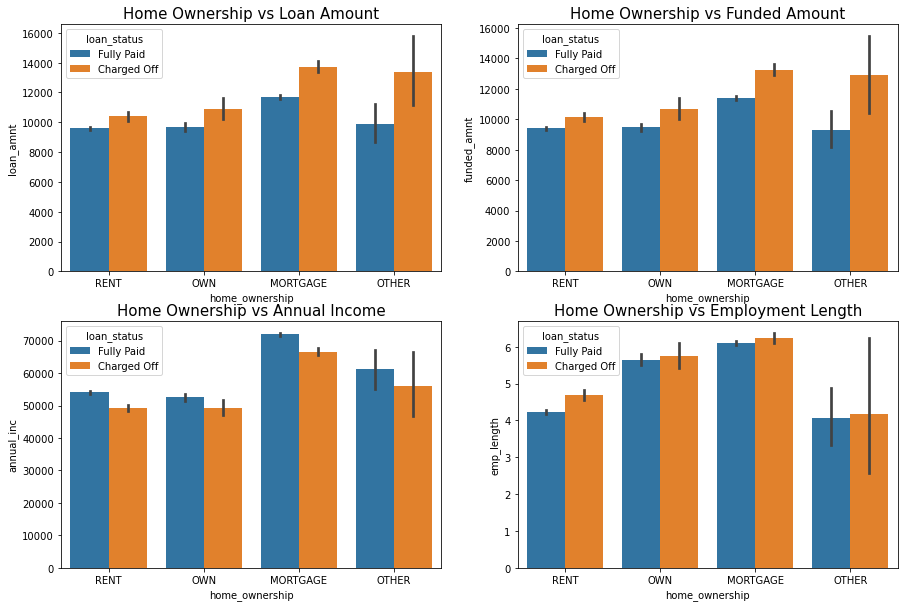

In [44]:
# Home Ownereship vs various

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].set_title("Home Ownership vs Loan Amount", fontsize=15)
sns.barplot(data=dataset_updated, x='home_ownership', y='loan_amnt', hue = 'loan_status', ax = ax[0, 0])

ax[0, 1].set_title("Home Ownership vs Funded Amount", fontsize=15)
sns.barplot(data=dataset_updated, x='home_ownership', y='funded_amnt', hue = 'loan_status', ax = ax[0, 1])

ax[1, 0].set_title("Home Ownership vs Annual Income", fontsize=15)
sns.barplot(data=dataset_updated, x='home_ownership', y='annual_inc', hue = 'loan_status', ax = ax[1, 0])

ax[1, 1].set_title("Home Ownership vs Employment Length", fontsize=15)
sns.barplot(data=dataset_updated, x='home_ownership', y='emp_length', hue = 'loan_status', ax = ax[1, 1])

plt.show()

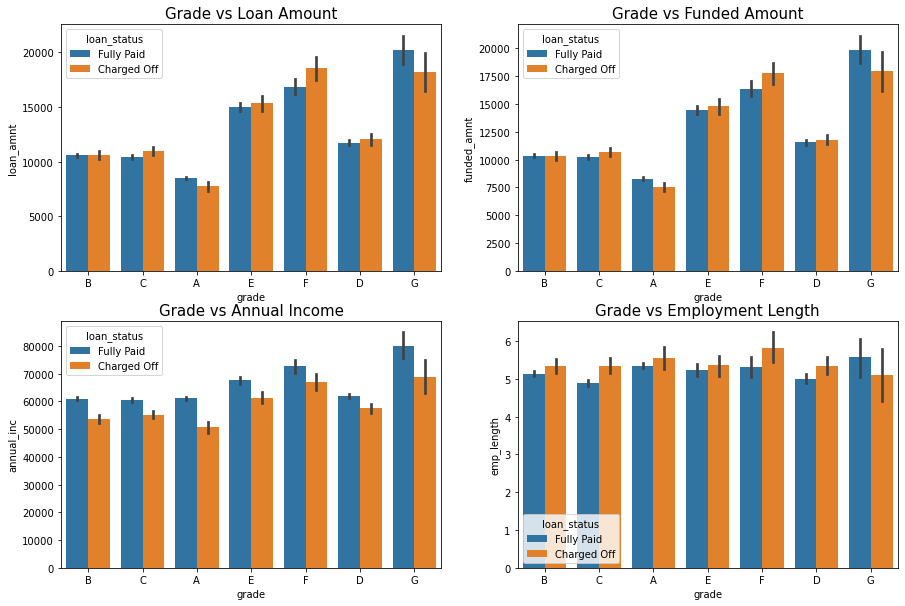

In [45]:
# Grade vs various

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].set_title("Grade vs Loan Amount", fontsize=15)
sns.barplot(data=dataset_updated, x='grade', y='loan_amnt', hue = 'loan_status', ax = ax[0, 0])

ax[0, 1].set_title("Grade vs Funded Amount", fontsize=15)
sns.barplot(data=dataset_updated, x='grade', y='funded_amnt', hue = 'loan_status', ax = ax[0, 1])

ax[1, 0].set_title("Grade vs Annual Income", fontsize=15)
sns.barplot(data=dataset_updated, x='grade', y='annual_inc', hue = 'loan_status', ax = ax[1, 0])

ax[1, 1].set_title("Grade vs Employment Length", fontsize=15)
sns.barplot(data=dataset_updated, x='grade', y='emp_length', hue = 'loan_status', ax = ax[1, 1])

plt.show()

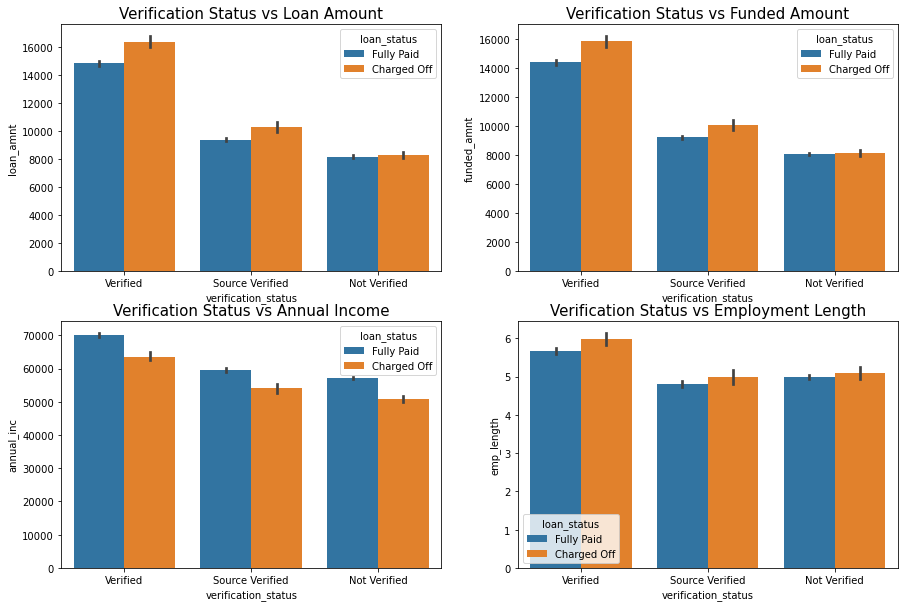

In [46]:
# Verification Status vs various

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].set_title("Verification Status vs Loan Amount", fontsize=15)
sns.barplot(data=dataset_updated, x='verification_status', y='loan_amnt', hue = 'loan_status', ax = ax[0, 0])

ax[0, 1].set_title("Verification Status vs Funded Amount", fontsize=15)
sns.barplot(data=dataset_updated, x='verification_status', y='funded_amnt', hue = 'loan_status', ax = ax[0, 1])

ax[1, 0].set_title("Verification Status vs Annual Income", fontsize=15)
sns.barplot(data=dataset_updated, x='verification_status', y='annual_inc', hue = 'loan_status', ax = ax[1, 0])

ax[1, 1].set_title("Verification Status vs Employment Length", fontsize=15)
sns.barplot(data=dataset_updated, x='verification_status', y='emp_length', hue = 'loan_status', ax = ax[1, 1])

plt.show()

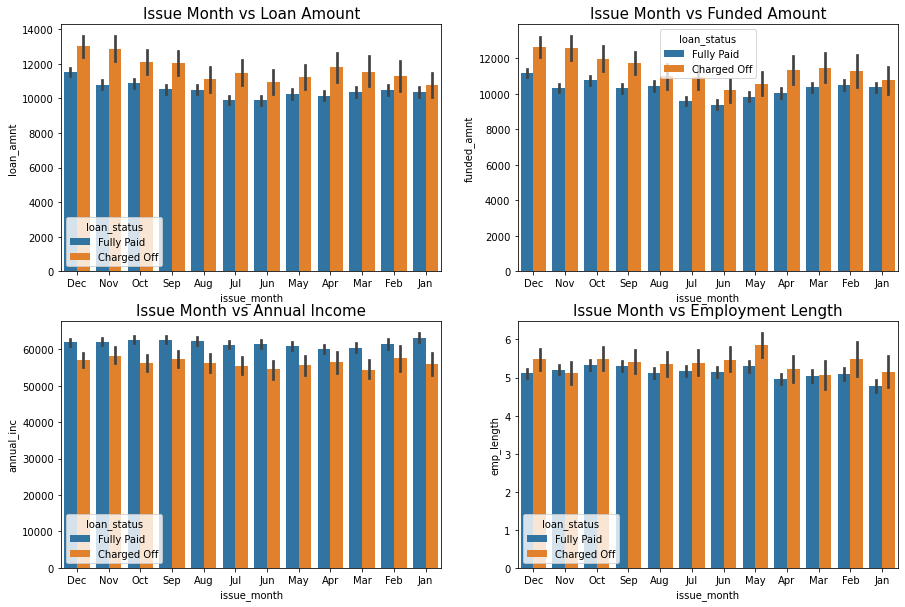

In [47]:
# Loan Issue Month vs various

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].set_title("Issue Month vs Loan Amount", fontsize=15)
sns.barplot(data=dataset_updated, x='issue_month', y='loan_amnt', hue = 'loan_status', ax = ax[0, 0])

ax[0, 1].set_title("Issue Month vs Funded Amount", fontsize=15)
sns.barplot(data=dataset_updated, x='issue_month', y='funded_amnt', hue = 'loan_status', ax = ax[0, 1])

ax[1, 0].set_title("Issue Month vs Annual Income", fontsize=15)
sns.barplot(data=dataset_updated, x='issue_month', y='annual_inc', hue = 'loan_status', ax = ax[1, 0])

ax[1, 1].set_title("Issue Month vs Employment Length", fontsize=15)
sns.barplot(data=dataset_updated, x='issue_month', y='emp_length', hue = 'loan_status', ax = ax[1, 1])

plt.show()

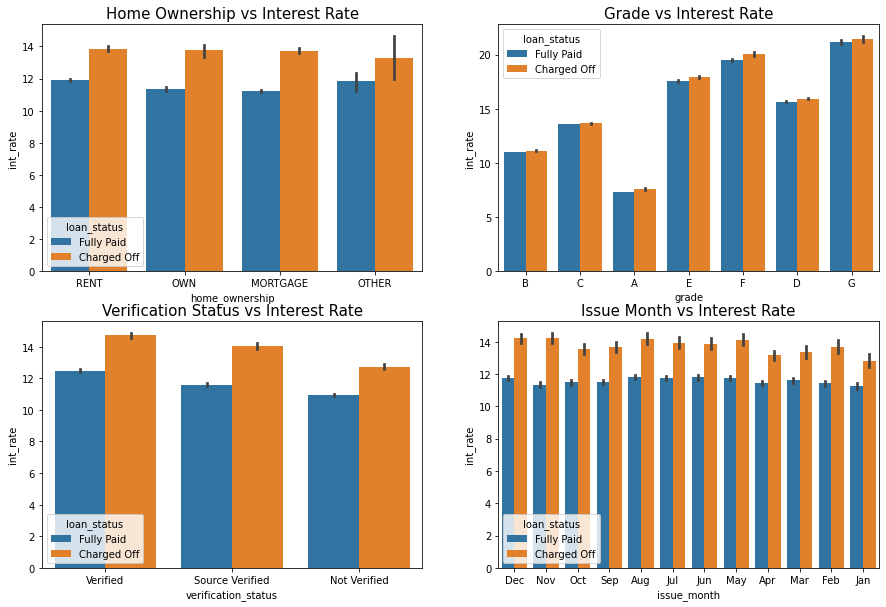

In [48]:
# Interest Rate vs various

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].set_title("Home Ownership vs Interest Rate", fontsize=15)
sns.barplot(data=dataset_updated, x='home_ownership', y='int_rate', hue = 'loan_status', ax = ax[0, 0])

ax[0, 1].set_title("Grade vs Interest Rate", fontsize=15)
sns.barplot(data=dataset_updated, x='grade', y='int_rate', hue = 'loan_status', ax = ax[0, 1])

ax[1, 0].set_title("Verification Status vs Interest Rate", fontsize=15)
sns.barplot(data=dataset_updated, x='verification_status', y='int_rate', hue = 'loan_status', ax = ax[1, 0])

ax[1, 1].set_title("Issue Month vs Interest Rate", fontsize=15)
sns.barplot(data=dataset_updated, x='issue_month', y='int_rate', hue = 'loan_status', ax = ax[1, 1])

plt.show()

## `Bivariate Observations`

### Based on above bivariate visualizations, we can infer that loan applications with below features have more chances to be defaulters

- ### Loan amount upto 15000 and have Home ownership of Mortgage or Other
- ### Loan amount of 13000 - 18000 and Grade F or E
- ### Annual income around 50000 and Grade F or E
- ### Verification status of 'Verified' and Loan Amount around 15000
- ### Verification status of 'Verified' and employment length of about 5 years
- ### Interest rate > 12%

# `Conclusion`

## Based on various analysis done, Loans with below characteristics are most likely to be defaulters:
- ### Loan purpose is `debt-consolidation`, is a `36` month loan, and loan being applied for in month of `December`
- ### Loan amount is less than `15000`, borrower home ownership be one of `rent` or `mortgage`
- ### Loan is on high interest rate `>12%`, with borrower annual income in range of `31K - 58K`
- ### Loan Grade is `E or F`, Borrower state is `CA`